In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('bmh')

In [2]:
# Load data into data frame
df = pd.read_csv('raw_data.csv')
df.head()

c:\program files\python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,facility_name,facility_type_display,improved_water_supply,improved_sanitation,chalkboard_each_classroom_yn,num_tchrs_with_nce,num_tchr_full_time,num_students_total,num_classrms_total,phcn_electricity,...,community,ward,management,sector,formhub_photo_id,gps,survey_id,unique_lga,latitude,longitude
0,CPS SWALI,Primary school only,True,True,False,9.0,9.0,776.0,12.0,False,...,Swali,3,public,education,1393404015008.jpg,4.91691036 6.27412844 31.5 5.0,51885096-65a1-4f1f-8c2a-3b11d9ae40bb,bayelsa_yenagoa,4.916910,6.274128
1,NANA Basic Academy,Primary and Junior Secondary school combined,False,False,NaN,NaN,NaN,NaN,NaN,False,...,Mpape,Dutse,private,education,1396960914896.jpg,9.140918333333333 7.496761666666667 697.0 4.5,7f3ea41a-e4cb-41dd-85fc-5fa54c42d09f,fct_bwari,9.140918,7.496762
2,L.E.A Primary School Pabeyi,Primary school only,True,True,False,9.0,11.0,283.0,9.0,False,...,Pabeyi,Dobi,public,education,1397575395444.jpg,9.174855 7.0220616666666675 236.8 5.0,56f2e625-ec43-4c39-97a8-d6379dceefa2,fct_gwagwalada,9.174855,7.022062
3,L.E.A.PrimarySchoolPagadna,Primary school only,False,True,False,4.0,5.0,247.0,7.0,False,...,Pagadna,Dobi,public,education,1398262573409.jpg,9.115846666666666 6.962314999999999 216.5 4.4,2932eda8-64b1-4068-8412-3b2e099062fc,fct_gwagwalada,9.115847,6.962315
4,Syflora Academy,Primary school only,False,True,True,4.0,8.0,66.0,10.0,True,...,Mpape,Dutse,private,education,1396959110576.jpg,9.141155 7.499665000000001 693.2 4.7,e17acb1e-364a-4a90-9384-0d612bb240c5,fct_bwari,9.141155,7.499665


In [3]:
df.shape

(98667, 28)

In [4]:
df.columns

Index(['facility_name', 'facility_type_display', 'improved_water_supply',
       'improved_sanitation', 'chalkboard_each_classroom_yn',
       'num_tchrs_with_nce', 'num_tchr_full_time', 'num_students_total',
       'num_classrms_total', 'phcn_electricity', 'num_toilets_total',
       'num_students_male', 'num_students_female', 'num_tchrs_male',
       'num_tchrs_female', 'date_of_survey', 'education_type', 'facility_id',
       'community', 'ward', 'management', 'sector', 'formhub_photo_id', 'gps',
       'survey_id', 'unique_lga', 'latitude', 'longitude'],
      dtype='object')

In [5]:
# Drop irrelevant columns
df.drop(['education_type', 'community', 'ward', 'facility_type_display', 'formhub_photo_id', 'gps', 'survey_id', 'latitude',
       'longitude', 'date_of_survey', 'sector'], axis=1, inplace=True)

In [6]:
# Define a new order of columns
order = ['facility_id', 'facility_name',
         'management', 'unique_lga',
         'improved_water_supply', 'improved_sanitation', 'phcn_electricity',
         'chalkboard_each_classroom_yn', 'num_classrms_total', 'num_toilets_total',
         'num_tchrs_with_nce', 'num_tchr_full_time', 'num_students_male',
         'num_students_female', 'num_tchrs_male', 'num_tchrs_female', 'num_students_total']

In [7]:
# Re-order columns
df = df[order]

In [8]:
# Rename Columns
df.columns = ['Facility_ID', 'Facility_name', 'Management', 'State',
       'Improved_water_supply', 'Improved_sanitation', 'Public_electricity',
       'Chalkboard/classroom', 'Classrooms', 'Toilets',
       'NCE_teachers', 'Fulltime_teachers', 'Male_students',
       'Female_students', 'Male_teachers',
       'Female_teachers', 'Total_students']

In [9]:
df.head()

,Facility_ID,Facility_name,Management,State,Improved_water_supply,Improved_sanitation,Public_electricity,Chalkboard/classroom,Classrooms,Toilets,NCE_teachers,Fulltime_teachers,Male_students,Female_students,Male_teachers,Female_teachers,Total_students
0,EIRJK,CPS SWALI,public,bayelsa_yenagoa,True,True,False,False,12.0,21.0,9.0,9.0,383.0,393.0,5.0,4.0,776.0
1,ENQHE,NANA Basic Academy,private,fct_bwari,False,False,False,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EDJJK,L.E.A Primary School Pabeyi,public,fct_gwagwalada,True,True,False,False,9.0,2.0,9.0,11.0,185.0,98.0,9.0,2.0,283.0
3,ELOOD,L.E.A.PrimarySchoolPagadna,public,fct_gwagwalada,False,True,False,False,7.0,2.0,4.0,5.0,147.0,100.0,5.0,0.0,247.0
4,EZJOH,Syflora Academy,private,fct_bwari,False,True,True,True,10.0,4.0,4.0,8.0,29.0,37.0,2.0,6.0,66.0


In [10]:
# Check if there are missing values
df.isnull().any()

Facility_ID              False
Facility_name             True
Management                True
State                     True
Improved_water_supply     True
Improved_sanitation       True
Public_electricity        True
Chalkboard/classroom      True
Classrooms                True
Toilets                   True
NCE_teachers              True
Fulltime_teachers         True
Male_students             True
Female_students           True
Male_teachers             True
Female_teachers           True
Total_students            True
dtype: bool

In [11]:
# Check the total number of missing values for each column
df.isnull().sum()

Facility_ID                 0
Facility_name             214
Management               1223
State                       1
Improved_water_supply     279
Improved_sanitation       297
Public_electricity        277
Chalkboard/classroom     2161
Classrooms               3292
Toilets                  2962
NCE_teachers             3530
Fulltime_teachers        2164
Male_students            4375
Female_students          4346
Male_teachers            3680
Female_teachers          3319
Total_students           5262
dtype: int64

In [12]:
# Check dataset shape to decide whether to drop missing values on rows or column
df.shape

(98667, 17)

In [13]:
# Since dataset appears to have almost 99,000 rows, drop rows with missing values and retain all attributes(columns)
df.dropna(axis=0, inplace=True)

In [14]:
# Check to see if there are still missing values
df.isnull().sum().any()

False

In [15]:
# Check the new shape of data
df.shape

(87387, 17)

In [16]:
df.head()

,Facility_ID,Facility_name,Management,State,Improved_water_supply,Improved_sanitation,Public_electricity,Chalkboard/classroom,Classrooms,Toilets,NCE_teachers,Fulltime_teachers,Male_students,Female_students,Male_teachers,Female_teachers,Total_students
0,EIRJK,CPS SWALI,public,bayelsa_yenagoa,True,True,False,False,12.0,21.0,9.0,9.0,383.0,393.0,5.0,4.0,776.0
2,EDJJK,L.E.A Primary School Pabeyi,public,fct_gwagwalada,True,True,False,False,9.0,2.0,9.0,11.0,185.0,98.0,9.0,2.0,283.0
3,ELOOD,L.E.A.PrimarySchoolPagadna,public,fct_gwagwalada,False,True,False,False,7.0,2.0,4.0,5.0,147.0,100.0,5.0,0.0,247.0
4,EZJOH,Syflora Academy,private,fct_bwari,False,True,True,True,10.0,4.0,4.0,8.0,29.0,37.0,2.0,6.0,66.0
5,EULMF,Nomadic Paiko Kore,public,fct_gwagwalada,True,True,False,True,6.0,2.0,4.0,6.0,44.0,76.0,5.0,1.0,120.0


In [17]:
states = ["Abia", "Adamawa", "Akwa_Ibom", "Anambra", "Bauchi", "Bayelsa",
          "Benue", "Borno", "Cross_River", "Delta", "Ebonyi", "Edo", 
          "Ekiti", "Enugu", "fct", "Gombe", "Imo", "Jigawa", "Kaduna",
          "Kano", "Katsina", "Kebbi", "Kogi", "Kwara", "Lagos", "Nasarawa",
          "Niger", "Ogun", "Ondo", "Osun", "Oyo", "Plateau", "Rivers",
          "Sokoto", "Taraba", "Yobe", "Zamfara"]

In [18]:
# Join L.G.A(s) in State column into 37 unique values to represent 36 states in Nigeria plus FCT
for i in states:
    df.loc[df['State'].str.contains(i, case=False), 'State'] = i
    df.loc[df['State'].str.contains('fct', case=False), 'State'] = 'FCT - Abuja'
    df.loc[df['State'].str.contains('Cross_River', case=False), 'State'] = 'Cross River'
    df.loc[df['State'].str.contains('Akwa_Ibom', case=False), 'State'] = 'Akwa Ibom'

In [19]:
# Check the unique values
df['State'].unique()

array(['Bayelsa', 'FCT - Abuja', 'Rivers', 'Cross River', 'Delta',
       'Kaduna', 'Sokoto', 'Katsina', 'Taraba', 'Gombe', 'Bauchi',
       'Adamawa', 'Oyo', 'Imo', 'Abia', 'Lagos', 'Ekiti', 'Plateau',
       'Nasarawa', 'Benue', 'Borno', 'Niger', 'Kogi', 'Akwa Ibom',
       'Kebbi', 'Ebonyi', 'Enugu', 'Kwara', 'Ondo', 'Jigawa', 'Yobe',
       'Ogun', 'Kano', 'Osun', 'Zamfara', 'Edo', 'Anambra'], dtype=object)

In [20]:
# Check the number of unique values
df['State'].nunique()

37

In [21]:
# Check for duplicates
df.set_index('Facility_ID', inplace=True)
df.duplicated().value_counts()

False    86743
True       644
dtype: int64

In [22]:
# Drop duplicates
df.drop_duplicates(keep='first', inplace=True)

In [23]:
# Check if there's still any duplicate
df.duplicated().any()

False

In [24]:
df.head()

,Facility_name,Management,State,Improved_water_supply,Improved_sanitation,Public_electricity,Chalkboard/classroom,Classrooms,Toilets,NCE_teachers,Fulltime_teachers,Male_students,Female_students,Male_teachers,Female_teachers,Total_students
Facility_ID,,,,,,,,,,,,,,,,
EIRJK,CPS SWALI,public,Bayelsa,True,True,False,False,12.0,21.0,9.0,9.0,383.0,393.0,5.0,4.0,776.0
EDJJK,L.E.A Primary School Pabeyi,public,FCT - Abuja,True,True,False,False,9.0,2.0,9.0,11.0,185.0,98.0,9.0,2.0,283.0
ELOOD,L.E.A.PrimarySchoolPagadna,public,FCT - Abuja,False,True,False,False,7.0,2.0,4.0,5.0,147.0,100.0,5.0,0.0,247.0
EZJOH,Syflora Academy,private,FCT - Abuja,False,True,True,True,10.0,4.0,4.0,8.0,29.0,37.0,2.0,6.0,66.0
EULMF,Nomadic Paiko Kore,public,FCT - Abuja,True,True,False,True,6.0,2.0,4.0,6.0,44.0,76.0,5.0,1.0,120.0


In [25]:
# Rename booleans to Yes and No to avoid issues
df[['Improved_water_supply', 'Improved_sanitation', 'Public_electricity', 'Chalkboard/classroom']]=\
df[['Improved_water_supply', 'Improved_sanitation', 'Public_electricity', 'Chalkboard/classroom']].replace([True, False], ['Yes', 'No'])

In [26]:
# Check categorical variables for unique values
unique = ['Management', 'Improved_water_supply', 'Improved_sanitation', 'Public_electricity', 'Chalkboard/classroom']
for i in unique:
    print(i, df[i].unique())

Management ['public' 'private' 'faith_based' 'none']
Improved_water_supply ['Yes' 'No']
Improved_sanitation ['Yes' 'No']
Public_electricity ['No' 'Yes']
Chalkboard/classroom ['No' 'Yes']


In [27]:
# Rename faith_based strings in Management column to 'private'
df.loc[df['Management'].str.contains('faith'), 'Management'] = 'private'

In [28]:
# drop rows containing 'none' in Management column
df.reset_index(inplace=True)
none = df['Management'] == 'none'
none_id = df[none]['Facility_ID'].tolist()
df.set_index('Facility_ID', inplace=True)
df.drop(index=none_id, inplace=True)
df.reset_index(inplace=True)

In [29]:
# Check for changes
unique = ['Management', 'Improved_water_supply', 'Improved_sanitation', 'Public_electricity', 'Chalkboard/classroom']
for i in unique:
    print(i, df[i].unique())

Management ['public' 'private']
Improved_water_supply ['Yes' 'No']
Improved_sanitation ['Yes' 'No']
Public_electricity ['No' 'Yes']
Chalkboard/classroom ['No' 'Yes']


In [30]:
df.head()

,Facility_ID,Facility_name,Management,State,Improved_water_supply,Improved_sanitation,Public_electricity,Chalkboard/classroom,Classrooms,Toilets,NCE_teachers,Fulltime_teachers,Male_students,Female_students,Male_teachers,Female_teachers,Total_students
0,EIRJK,CPS SWALI,public,Bayelsa,Yes,Yes,No,No,12.0,21.0,9.0,9.0,383.0,393.0,5.0,4.0,776.0
1,EDJJK,L.E.A Primary School Pabeyi,public,FCT - Abuja,Yes,Yes,No,No,9.0,2.0,9.0,11.0,185.0,98.0,9.0,2.0,283.0
2,ELOOD,L.E.A.PrimarySchoolPagadna,public,FCT - Abuja,No,Yes,No,No,7.0,2.0,4.0,5.0,147.0,100.0,5.0,0.0,247.0
3,EZJOH,Syflora Academy,private,FCT - Abuja,No,Yes,Yes,Yes,10.0,4.0,4.0,8.0,29.0,37.0,2.0,6.0,66.0
4,EULMF,Nomadic Paiko Kore,public,FCT - Abuja,Yes,Yes,No,Yes,6.0,2.0,4.0,6.0,44.0,76.0,5.0,1.0,120.0


In [31]:
# Descriptive Stattistics
df.describe()

,Classrooms,Toilets,NCE_teachers,Fulltime_teachers,Male_students,Female_students,Male_teachers,Female_teachers,Total_students
count,86716.000000,86716.00000,86716.000000,86716.000000,86716.000000,86716.000000,86716.000000,86716.000000,86716.000000
mean,8.263850,2.53297,6.943943,11.450770,177.051847,160.771864,5.627462,5.823308,337.823712
std,6.814235,5.40608,7.704881,11.196537,193.256530,180.348970,5.801499,8.072154,344.203813
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.00000,2.000000,5.000000,60.000000,51.000000,2.000000,0.000000,120.000000
50%,6.000000,1.00000,5.000000,8.000000,115.000000,101.000000,4.000000,3.000000,225.000000
75%,10.000000,4.00000,9.000000,14.000000,220.000000,200.000000,7.000000,8.000000,420.000000
max,514.000000,418.00000,98.000000,186.000000,2260.000000,2355.000000,98.000000,100.000000,2355.000000


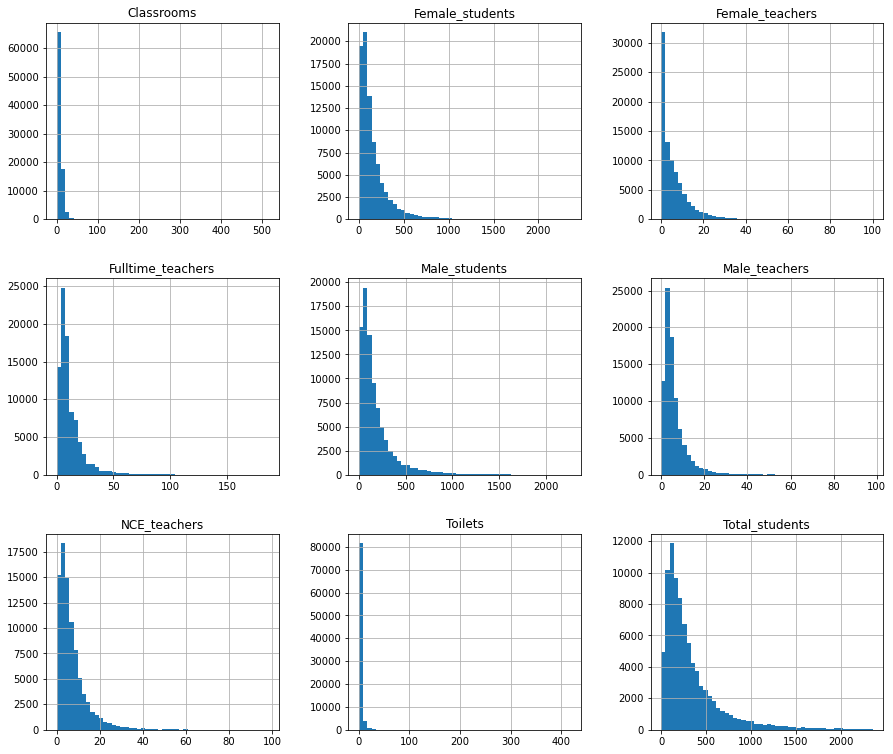

In [32]:
# Univariate Distribution of Numerical variables
df_dist = df.select_dtypes(include=['float'])
df_dist.hist(bins=50, figsize=(15,13));
plt.savefig('visuals/univariate-distribution.png')

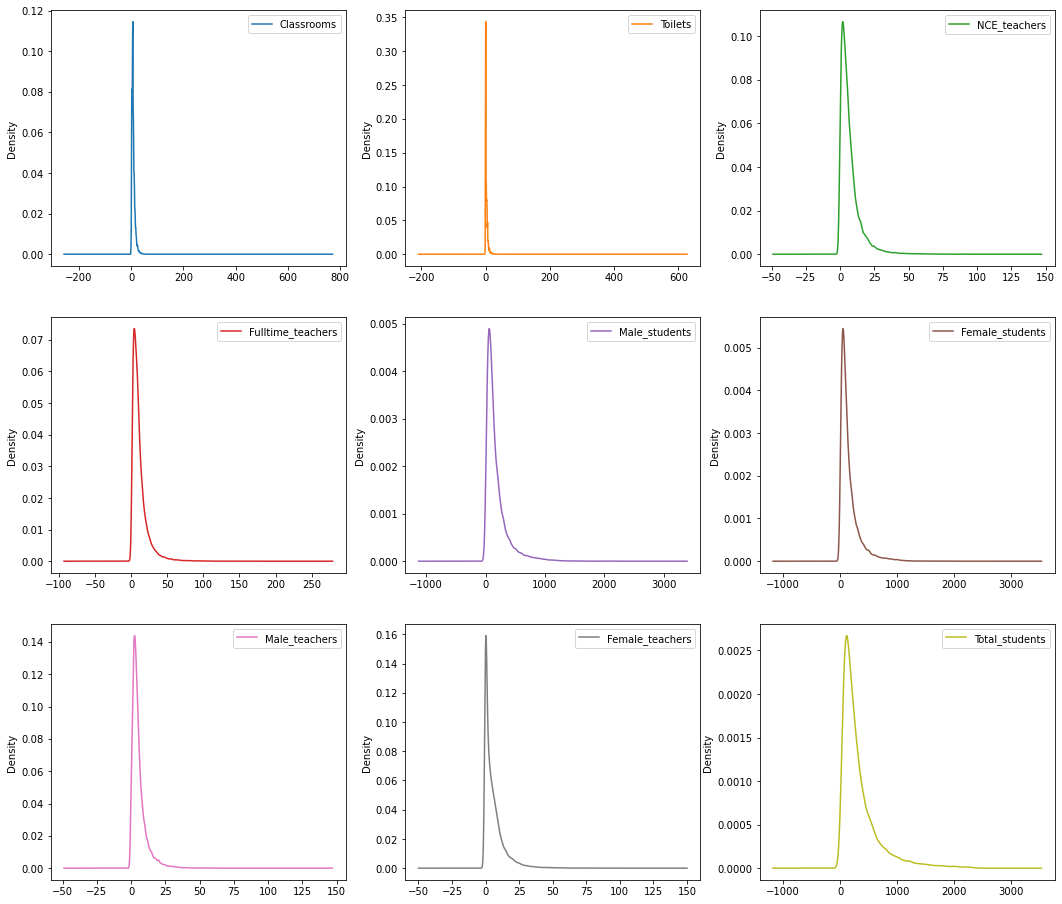

In [33]:
plt.rcParams['figure.figsize'] = [18, 16]
df.plot(kind="density",subplots=True,layout=(3,3),sharex=False,sharey=False)
plt.show()

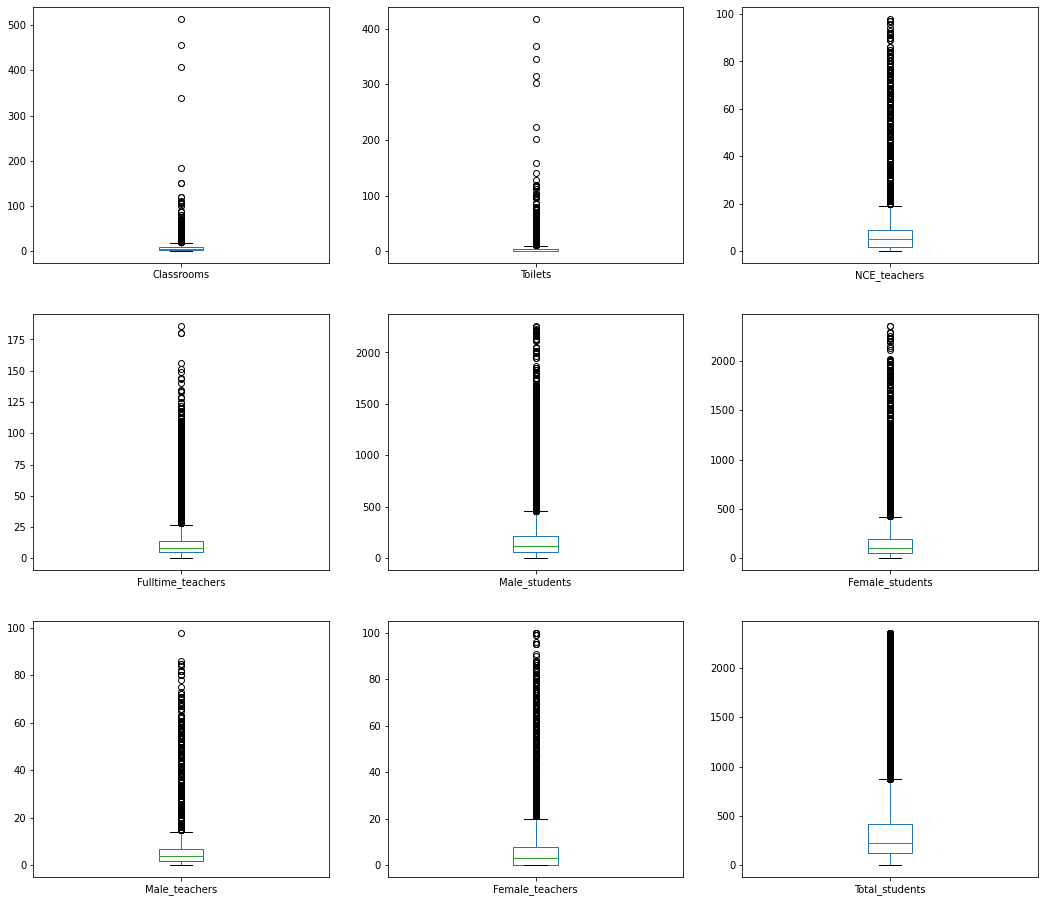

In [34]:
plt.rcParams['figure.figsize'] = [18, 16]
df.plot(kind="box",subplots=True,layout=(3,3),sharex=False,sharey=False)
plt.show()

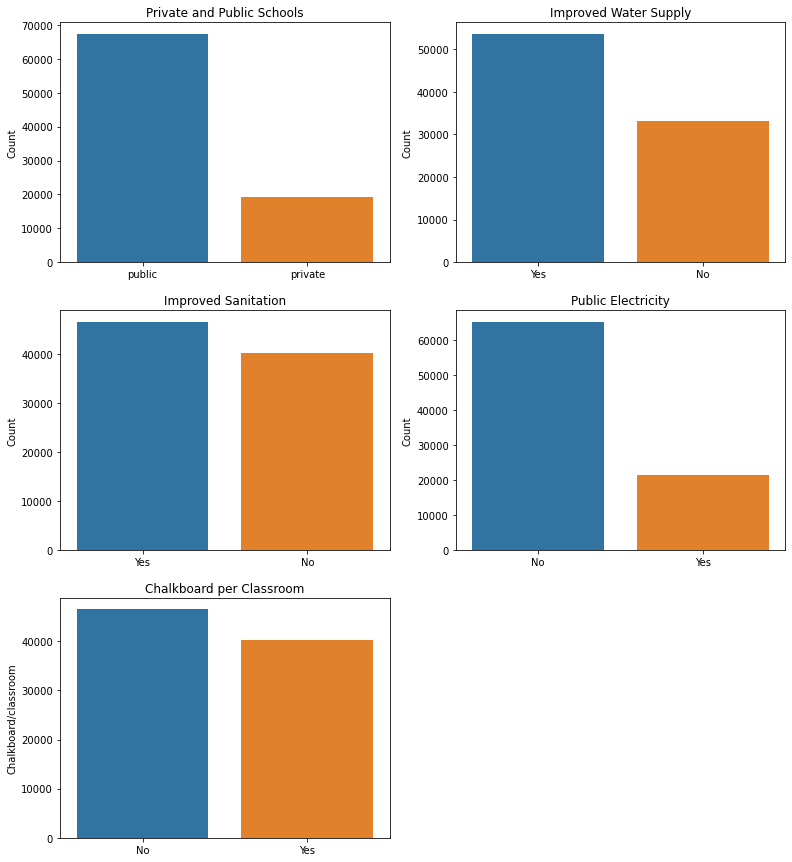

In [35]:
# Univariate Analysis of all categorical variables
fig = plt.figure(figsize=(13,15))
ax0 = fig.add_subplot(3,2,1)
ax1 = fig.add_subplot(3,2,2)
ax2 = fig.add_subplot(3,2,3)
ax3 = fig.add_subplot(3,2,4)
ax4 = fig.add_subplot(3,2,5)

sns.barplot(df['Management'].unique(), df['Management'].value_counts(), ax=ax0);
sns.barplot(df['Improved_water_supply'].unique(), df['Improved_water_supply'].value_counts(), ax=ax1);
sns.barplot(df['Improved_sanitation'].unique(), df['Improved_sanitation'].value_counts(), ax=ax2);
sns.barplot(df['Public_electricity'].unique(), df['Public_electricity'].value_counts(), ax=ax3);
sns.barplot(df['Chalkboard/classroom'].unique(), df['Chalkboard/classroom'].value_counts(), ax=ax4);

ax0.set_title('Private and Public Schools'), ax0.set_ylabel('Count')
ax1.set_title('Improved Water Supply'), ax1.set_ylabel('Count')
ax2.set_title('Improved Sanitation'), ax2.set_ylabel('Count')
ax3.set_title('Public Electricity'), ax3.set_ylabel('Count')
ax4.set_title('Chalkboard per Classroom')
plt.savefig('visuals/uni-categ-variables.png')

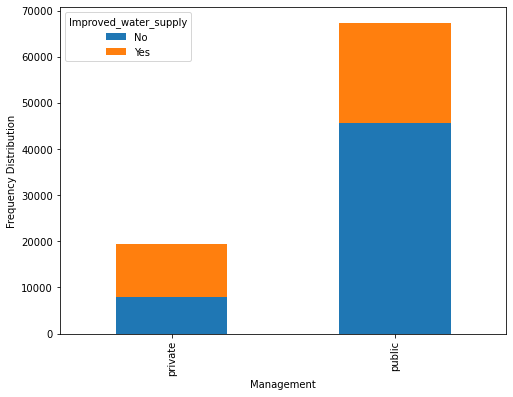

In [36]:
# Bivariate analysis of Management and Improved water supply
table = pd.crosstab(df['Management'], df['Improved_water_supply'])
table.plot(kind='bar', stacked=True,figsize=(8,6));
plt.ylabel('Frequency Distribution')
plt.savefig('visuals/biv-mgt-water-supply.png')

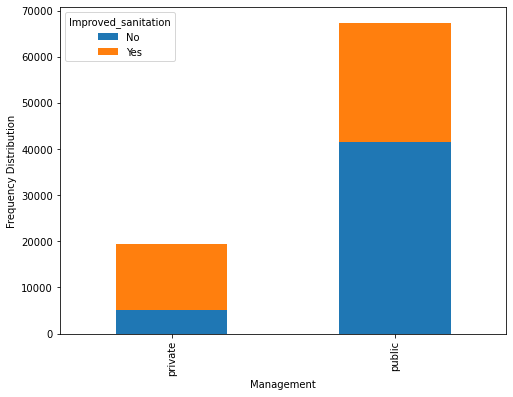

In [37]:
# Bivariate analysis of Management and Improved sanitation
table = pd.crosstab(df['Management'], df['Improved_sanitation'])
table.plot(kind='bar', stacked=True,figsize=(8,6));
plt.ylabel('Frequency Distribution')
plt.savefig('visuals/biv-mgt-sanitation.png')

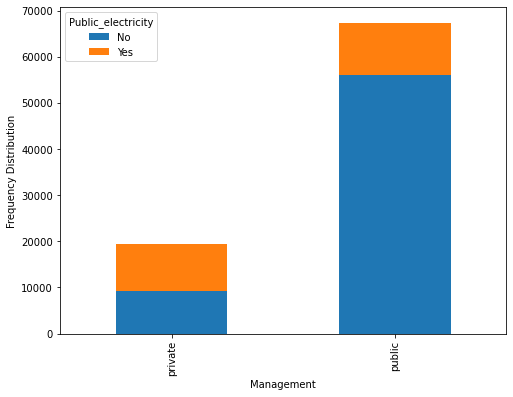

In [38]:
# Bivariate analysis of Management and Electricity
table = pd.crosstab(df['Management'], df['Public_electricity'])
table.plot(kind='bar', stacked=True,figsize=(8,6));
plt.ylabel('Frequency Distribution')
plt.savefig('visuals/biv-mgt-electricity.png')

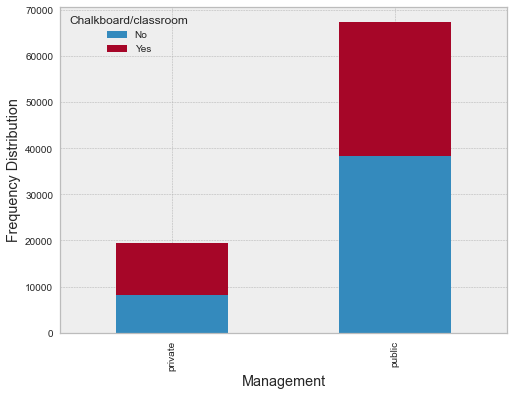

In [89]:
# Bivariate analysis of Management and Chalkboard
table = pd.crosstab(df['Management'], df['Chalkboard/classroom'])
table.plot(kind='bar', stacked=True,figsize=(8,6));
plt.ylabel('Frequency Distribution')
plt.savefig('visuals/biv-mgt-chalkboard.png')

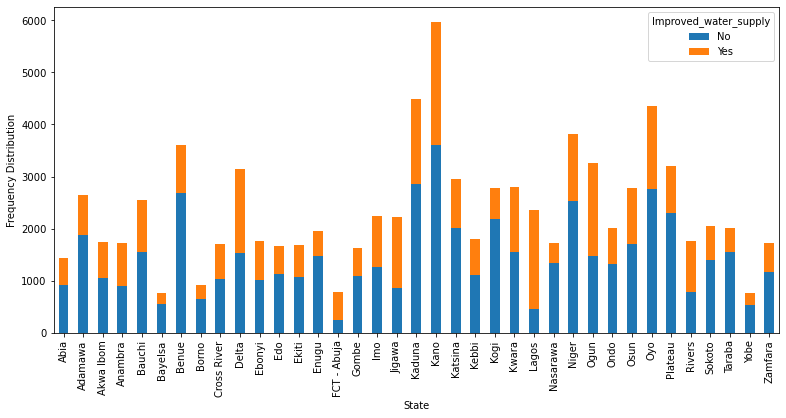

In [40]:
# Bivariate analysis of State and Improved water supply
table = pd.crosstab(df['State'], df['Improved_water_supply'])
table.plot(kind='bar', stacked=True,figsize=(13,6));
plt.ylabel('Frequency Distribution')
plt.savefig('visuals/biv-state-water-supply.png')

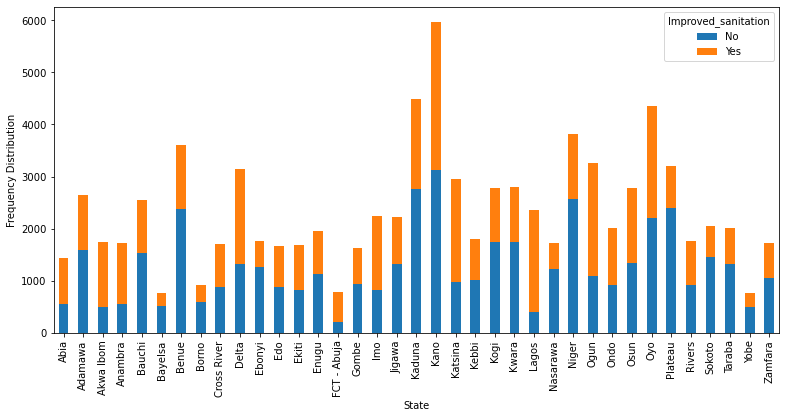

In [41]:
# Bivariate analysis of State and Improved sanitation
table = pd.crosstab(df['State'], df['Improved_sanitation'])
table.plot(kind='bar', stacked=True,figsize=(13,6));
plt.ylabel('Frequency Distribution')
plt.savefig('visuals/biv-state-sanitation.png')

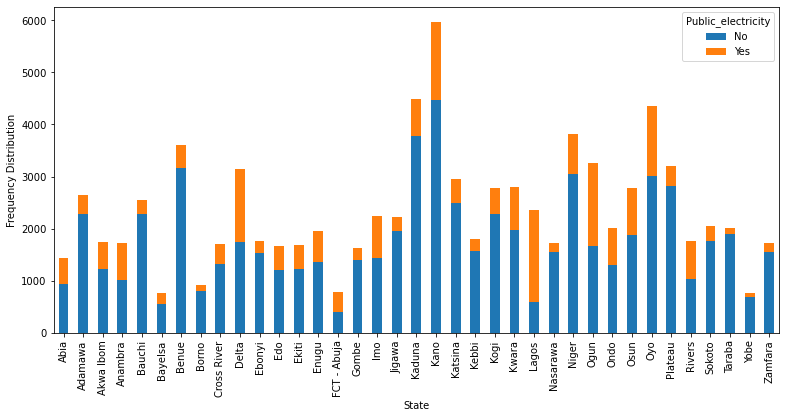

In [42]:
# Bivariate analysis of State and Electricity
table = pd.crosstab(df['State'], df['Public_electricity'])
table.plot(kind='bar', stacked=True,figsize=(13,6));
plt.ylabel('Frequency Distribution')
plt.savefig('visuals/biv-state-electricity.png')

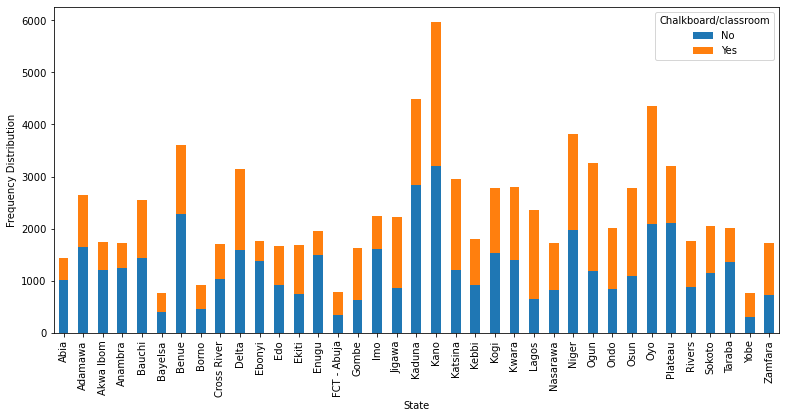

In [43]:
# Bivariate analysis of State and Chalkboard
table = pd.crosstab(df['State'], df['Chalkboard/classroom'])
table.plot(kind='bar', stacked=True,figsize=(13,6));
plt.ylabel('Frequency Distribution')
plt.savefig('visuals/biv-state-chalkboard')

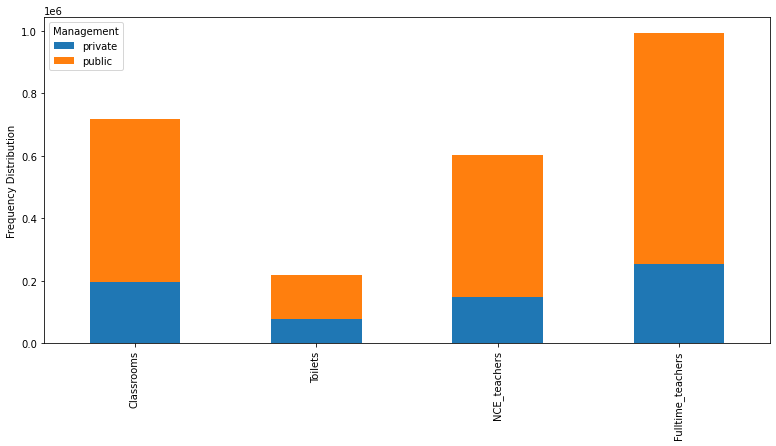

In [44]:
# Categorical variables comparison by Management
grouped = df.groupby('Management')[['Classrooms','Toilets','NCE_teachers','Fulltime_teachers']].sum().transpose()
grouped.plot(kind='bar', stacked=True, figsize=(13,6));
plt.ylabel('Frequency Distribution')
plt.savefig('visuals/biv-categ-mgt.png')

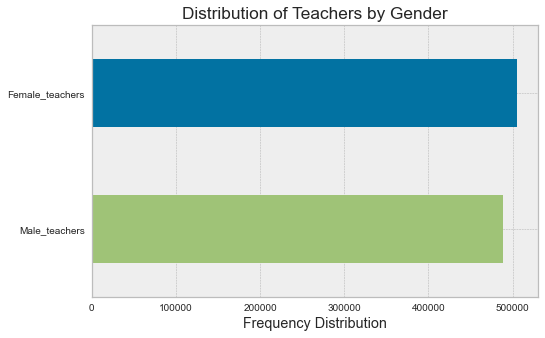

In [73]:
# Bivariate analysis of Male and Female Teachers
teachers = df[['Male_teachers', 'Female_teachers']].sum()
plt.figure(figsize=(8,5))
teachers.plot(kind='barh', color=['g', 'b']);
plt.title('Distribution of Teachers by Gender')
plt.xlabel('Frequency Distribution')
plt.savefig('visuals/biv-teachers-gender.png')

In [46]:
df_num = df[['Classrooms','Toilets',
              'NCE_teachers','Fulltime_teachers',
              'Male_teachers','Female_teachers','Total_students']]
df_num.head()

,Classrooms,Toilets,NCE_teachers,Fulltime_teachers,Male_teachers,Female_teachers,Total_students
0,12.0,21.0,9.0,9.0,5.0,4.0,776.0
1,9.0,2.0,9.0,11.0,9.0,2.0,283.0
2,7.0,2.0,4.0,5.0,5.0,0.0,247.0
3,10.0,4.0,4.0,8.0,2.0,6.0,66.0
4,6.0,2.0,4.0,6.0,5.0,1.0,120.0


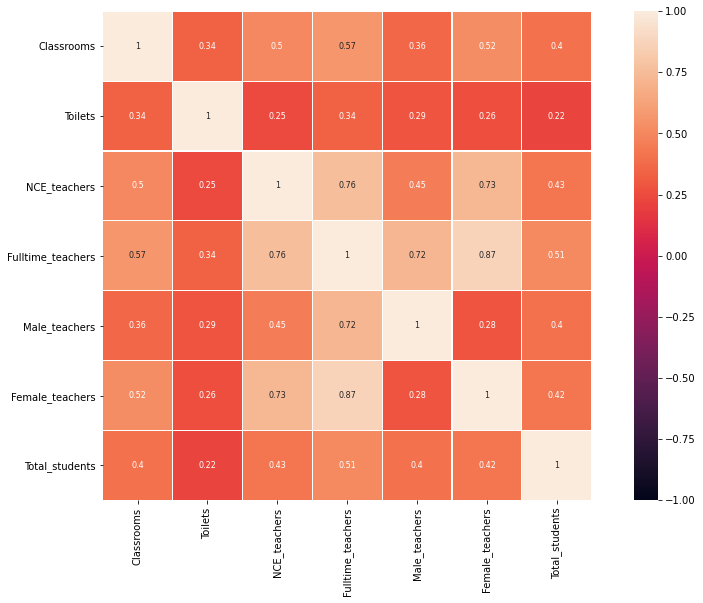

In [47]:
# Heatmap of numerical variables Correlation 
num_corr = df_num.corr()
#mask = num_corr < 0.5
plt.figure(figsize=(15,9))
sns.heatmap(num_corr, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.savefig('visuals/heatmap.png')

In [71]:
# Possible variables for further relationship analysis
df_num = df[['Classrooms','Toilets',
              'NCE_teachers','Fulltime_teachers',
              'Male_teachers','Female_teachers','Total_students']]
corr = df_num.corr()['Total_students'][:-1]
corr_fairly = corr[abs(corr) > 0.4]

C:\Users\Omotosho\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


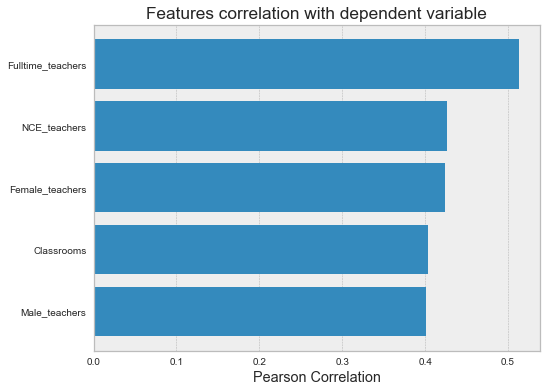

<Figure size 576x396 with 0 Axes>

In [87]:
#Visualizing variables that correlate with Total students with values greater than 0.4
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(8,6))
from yellowbrick.target import FeatureCorrelation
X = df_num[corr_fairly.index]
Y = df_num['Total_students']
feature_names = X.columns
visual = FeatureCorrelation(method='pearson', label=feature_names, sort=True).fit(X,Y)
visual.poof();
plt.savefig('visuals/corr-total-students.png')

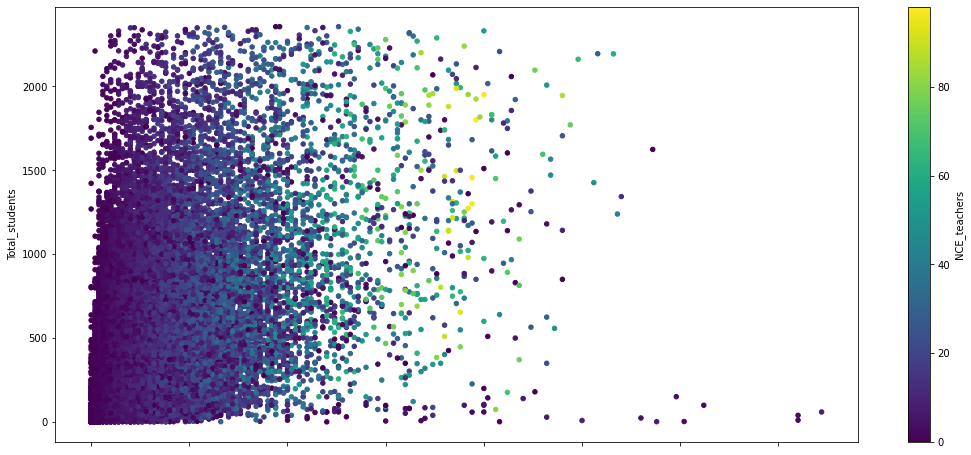

In [49]:
# Bivarate analysis of fulltime teachers, NCE teachers and total students
df_num.plot(kind='scatter',
            x='Fulltime_teachers',
            y='Total_students',
            c='NCE_teachers',
            cmap='viridis', figsize=(18,8))
plt.savefig('visuals/biv-full-nce-students.png')